In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

/home/jx4237/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


this .ipynb is multidimensional scaling

# Reddit Data

In [2]:
aus_comm = pd.read_csv('aus_comm_since2020_COVIDRelated_LIWCscores.csv')

In [10]:
aus_comm

,Topic,ColumnID,Text,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,-1,Document,One example of the pandemic lack of common sen...,1,10,99.00,40.06,7.03,1.00,10.00,...,0.0,0.0,10.00,10.00,0.00,0.0,0.0,0.00,0.00,0.0
1,0,Document,I hear coronavirus is the new hidden germ.,1,8,62.10,1.71,89.39,99.00,8.00,...,0.0,0.0,12.50,12.50,0.00,0.0,0.0,0.00,0.00,0.0
2,-1,Document,"1 confirmed case in chicago this morning, anot...",1,22,89.52,17.46,50.45,1.00,22.00,...,0.0,0.0,90.91,13.64,4.55,0.0,0.0,0.00,72.73,0.0
3,-1,Document,"CNBC. However, the 63 people are across the US...",1,24,82.63,1.71,39.59,1.00,8.00,...,0.0,0.0,91.67,20.83,4.17,0.0,0.0,0.00,66.67,0.0
4,-1,Document,[Two weeks](https://www.popsci.com/story/healt...,1,18,66.04,40.06,10.18,1.00,9.00,...,0.0,0.0,100.00,22.22,0.00,0.0,0.0,0.00,77.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70128,-1,Document,&gt;what the CDC is thinking\n\nThey've been q...,1,169,76.34,47.07,17.72,37.23,18.78,...,0.0,0.0,11.24,5.33,2.37,0.0,0.0,2.37,1.18,0.0
70129,15,Document,Sad if true. I haven’t been there post-pandemi...,1,26,8.56,1.00,98.89,20.23,13.00,...,0.0,0.0,19.23,3.85,3.85,0.0,0.0,7.69,3.85,0.0
70130,-1,Document,&gt;Early evidence suggests it's highly effect...,1,136,44.51,48.80,51.90,66.58,13.60,...,0.0,0.0,19.85,7.35,3.68,0.0,0.0,2.94,5.88,0.0
70131,-1,Document,As of a month ago they still weren’t doing phy...,1,27,6.03,8.59,77.17,99.00,27.00,...,0.0,0.0,18.52,3.70,3.70,0.0,0.0,3.70,7.41,0.0


In [3]:
# Pre-written description documents are convenient for describing information when doing visualization.
description = pd.read_excel('../description.xlsx', index_col=0)
description

,description,full
abb,,
Analytic,captures the degree to which people use words ...,Analytical thinking
Clout,"refers to the relative social status, confiden...",Clout
Authentic,tend to speak more spontaneously and do not s...,Authentic
Tone,"the higher the number, the more positive the ...",Emotional tone
Drives,"we, our, work, us",Drives
...,...,...
motion,"go, come, went, came",Motion
space,"in, out, up, there",Space
visual,"see, look, eye*, saw",Visual


In [4]:
description.index

Index(['Analytic', 'Clout', 'Authentic', 'Tone', 'Drives', 'affiliation',
       'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight',
       'cause', 'discrep', 'tentat', 'certitude', 'differ', 'memory', 'Affect',
       'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx',
       'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial',
       'polite', 'conflict', 'moral', 'comm', 'socrefs', 'family', 'friend',
       'female', 'male', 'Culture', 'politic', 'ethnicity', 'tech',
       'Lifestyle', 'leisure', 'home', 'work', 'money', 'relig', 'Physical',
       'health', 'illness', 'wellness', 'mental', 'substances', 'sexual',
       'food', 'death', 'need', 'want', 'acquire', 'lack', 'fulfill',
       'fatigue', 'reward', 'risk', 'curiosity', 'allure', 'Perception',
       'attention', 'motion', 'space', 'visual', 'auditory', 'feeling'],
      dtype='object', name='abb')

In [5]:
# see LIWC-22Manual-DevelopmentandPsychometrics.pdf
# this is potentially used categories
mainLingList = list(aus_comm.columns[33:105])

In [12]:
# variables categories
top_variables = ['Analytic','Clout','Authentic','Tone',]

first_leaves = ['Drives','Social','Culture','Cognition','Affect','Lifestyle','Physical','Perception']


second_leaves = ['affiliation','achieve','power','allnone','cogproc','memory','tone_pos','tone_neg','emotion','swear', 'socbehav','socrefs','politic','ethnicity','tech','leisure','home','work','money','relig','health','substances','sexual','food','death','need','want','acquire','lack','fulfill','fatigue','reward','risk','curiosity','allure','attention','motion','space','visual','auditory','feeling']

third_leaves = ['insight','cause','discrep','tentat','certitude','differ','emo_pos','emo_neg', 'emo_anx','emo_anger','emo_sad','prosocial','polite','conflict','moral','comm','family','friend','female','male','illness','wellness','mental',]


In [7]:
from sklearn.metrics.pairwise import cosine_similarity  # cosine similarity
from sklearn.manifold import MDS

# mds function
def mdsForGivenVariable(target_variables):
    fourForMDS = aus_comm[target_variables]
    ling_distribution = fourForMDS.stack().unstack(0)
    ling_name = ling_distribution.index
    s = pd.DataFrame(data=cosine_similarity(ling_distribution),
                        index=ling_name, columns=ling_name)
    mds = MDS(random_state=0)
    s_transform = mds.fit_transform(s)
    df_sub = pd.DataFrame(s_transform,index=s.index,columns=['X','Y'])
    df_sub['mean'] = aus_comm.describe()[target_variables].stack().unstack(0)['mean']
    df_sub['std'] = aus_comm.describe()[target_variables].stack().unstack(0)['std']
    df_sub['description'] = description['description']
    df_sub['full'] = description['full']
    return df_sub

### MDS

Two html files (main and sub) are produced here. Each graph shows the relative position, the standard deviation (variation) is represented by size, and the absolute value (absolute value) is represented by color.

#### summary variables and first layer combined

In [21]:
# get the results of MDS
df_sub = mdsForGivenVariable(top_variables+first_leaves)

import plotly.express as px
import plotly.graph_objects as go
import textwrap # Used to automatically wrap the floating window

mean = df_sub['mean']
std = df_sub['std']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sub['X'],y=df_sub['Y'],customdata=np.stack((df_sub['description'].apply(lambda t: str(t)).apply(lambda t: "<br>".join(textwrap.wrap(t,40)) # textwrap is a great way to automatically wrap lines
)),axis=-1),
                         marker=dict(
                             size=mean,       # mean 
                             sizemin=8, sizemode='area',sizeref=1.*max(mean)/(40.**2), 
                             color=std, colorscale='Sunset', showscale=True,colorbar_title_text='Variation <br>(standard deviation)',
                         ),
                         text = df_sub['full'],  
                         mode='markers+text',
                         hovertemplate=
        "<b>%{text}</b><br>" +
        "<b>Examples: </b>: %{customdata}<br>"+
        "<b>Mean Value: </b>%{marker.size:,}<br>" +
                         "<b>Variation:</b> %{marker.color:,.1f}" +
        "<extra></extra>",
                         ))

fig.update_layout(title='MDS: LIWC top layer variables and summaries variables',
width=600*1.3,
                     height=500*1.3,)
fig.update_traces(textposition='middle center',textfont_size=13)
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()
fig.write_html("MDS_LIWC top layer variables and summaries variables.html")

/home/jx4237/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



#### 4 summary variables: 'Analytic','Clout','Authentic','Tone'

In [14]:
# get the results of MDS
df_sub = mdsForGivenVariable(top_variables)
import plotly.express as px
import plotly.graph_objects as go
import textwrap # Used to automatically wrap the floating window

mean = df_sub['mean']
std = df_sub['std']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sub['X'],y=df_sub['Y'],customdata=np.stack((df_sub['description'].apply(lambda t: str(t)).apply(lambda t: "<br>".join(textwrap.wrap(t,40)) # textwrap is a great way to automatically wrap lines
)),axis=-1),
                         marker=dict(
                             size=mean,       # mean 
                             sizemin=8, sizemode='area',sizeref=1.*max(mean)/(40.**2), 
                             color=std, colorscale='Sunset', showscale=True,colorbar_title_text='Variation <br>(standard deviation)',
                         ),
                         text = df_sub['full'],  
                         mode='markers+text',
                         hovertemplate=
        "<b>%{text}</b><br>" +
        "<b>Examples: </b>: %{customdata}<br>"+
        "<b>Mean Value: </b>%{marker.size:,}<br>" +
                         "<b>Variation:</b> %{marker.color:,.1f}" +
        "<extra></extra>",
                         ))

fig.update_layout(title='MDS: LIWC top layer variables',
width=600*1.3,
                     height=500*1.3,)
fig.update_traces(textposition='middle center',textfont_size=13)
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()
fig.write_html("MDS_LIWC top layer variables.html")

#### first_layer_leaves

In [15]:
df_sub = mdsForGivenVariable(first_leaves)

/home/jx4237/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



In [16]:
import plotly.express as px
import plotly.graph_objects as go
import textwrap # Used to automatically wrap the floating window

mean = df_sub['mean']
std = df_sub['std']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sub['X'],y=df_sub['Y'],customdata=np.stack((df_sub['description'].apply(lambda t: str(t)).apply(lambda t: "<br>".join(textwrap.wrap(t,40)) # textwrap is a great way to automatically wrap lines
)),axis=-1),
                         marker=dict(
                             size=mean,       # mean 
                             sizemin=8, sizemode='area',sizeref=1.*max(mean)/(40.**2), 
                             color=std, colorscale='Sunset', showscale=True,colorbar_title_text='Variation <br>(standard deviation)',
                         ),
                         text = df_sub['full'],  
                         mode='markers+text',
                         hovertemplate=
        "<b>%{text}</b><br>" +
        "<b>Examples: </b>: %{customdata}<br>"+
        "<b>Mean Value: </b>%{marker.size:,}<br>" +
                         "<b>Variation:</b> %{marker.color:,.1f}" +
        "<extra></extra>",
                         ))

fig.update_layout(title='MDS: LIWC first_layer_leaves',
width=600*1.5,
                     height=500*1.5,)
fig.update_traces(textposition='middle center',textfont_size=13)
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()
fig.write_html("MDS_LIWC first_layer_leaves.html")

#### second_layer_leaves

In [17]:
df_sub = mdsForGivenVariable(second_leaves)

/home/jx4237/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



In [18]:
import plotly.express as px
import plotly.graph_objects as go
import textwrap # Used to automatically wrap the floating window

mean = df_sub['mean']
std = df_sub['std']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sub['X'],y=df_sub['Y'],customdata=np.stack((df_sub['description'].apply(lambda t: str(t)).apply(lambda t: "<br>".join(textwrap.wrap(t,40)) # textwrap is a great way to automatically wrap lines
)),axis=-1),
                         marker=dict(
                             size=mean,       # mean 
                             sizemin=8, sizemode='area',sizeref=1.*max(mean)/(40.**2), 
                             color=std, colorscale='Sunset', showscale=True,colorbar_title_text='Variation <br>(standard deviation)',
                         ),
                         text = df_sub['full'],  
                         mode='markers+text',
                         hovertemplate=
        "<b>%{text}</b><br>" +
        "<b>Examples: </b>: %{customdata}<br>"+
        "<b>Mean Value: </b>%{marker.size:,}<br>" +
                         "<b>Variation:</b> %{marker.color:,.1f}" +
        "<extra></extra>",
                         ))

fig.update_layout(title='MDS: LIWC second_layer_leaves',
width=600*1.5,
                     height=500*1.5,)
fig.update_traces(textposition='middle center',textfont_size=13)
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()
fig.write_html("MDS_LIWC second_layer_leaves.html")

#### third_layer_leaves

In [19]:
df_sub = mdsForGivenVariable(third_leaves)

/home/jx4237/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



In [20]:
import plotly.express as px
import plotly.graph_objects as go
import textwrap # Used to automatically wrap the floating window

mean = df_sub['mean']
std = df_sub['std']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sub['X'],y=df_sub['Y'],customdata=np.stack((df_sub['description'].apply(lambda t: str(t)).apply(lambda t: "<br>".join(textwrap.wrap(t,40)) # textwrap is a great way to automatically wrap lines
)),axis=-1),
                         marker=dict(
                             size=mean,       # mean 
                             sizemin=8, sizemode='area',sizeref=1.*max(mean)/(40.**2), 
                             color=std, colorscale='Sunset', showscale=True,colorbar_title_text='Variation <br>(standard deviation)',
                         ),
                         text = df_sub['full'],  
                         mode='markers+text',
                         hovertemplate=
        "<b>%{text}</b><br>" +
        "<b>Examples: </b>: %{customdata}<br>"+
        "<b>Mean Value: </b>%{marker.size:,}<br>" +
                         "<b>Variation:</b> %{marker.color:,.1f}" +
        "<extra></extra>",
                         ))

fig.update_layout(title='MDS: LIWC third_layer_leaves',
width=600*1.5,
                     height=500*1.5,)
fig.update_traces(textposition='middle center',textfont_size=13)
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()
fig.write_html("MDS_LIWC third_layer_leaves.html")

#### other descriptions

C:\Users\jiawei\AppData\Local\Temp\ipykernel_24304\1753450561.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0.5, 1.0, 'Cumulative Distribution Function (CDF) of four LIWC Values')

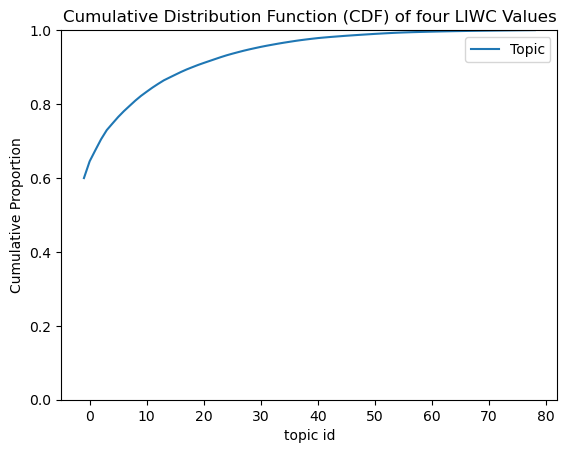

In [93]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)
def drawCDF(LIWCword):
    x , y = zip(*zip((np.cumsum(aus_comm[LIWCword].value_counts().sort_index())/np.sum(aus_comm[LIWCword].value_counts().sort_index())).index,(np.cumsum(aus_comm[LIWCword].value_counts().sort_index())/np.sum(aus_comm[LIWCword].value_counts().sort_index())).values))
    ax.plot(x, y,label = LIWCword)

drawCDF('Topic')

plt.legend()
plt.ylim([0,1])
plt.xlabel("topic id")
plt.ylabel("Cumulative Proportion")
plt.title("Cumulative Distribution Function (CDF) of four LIWC Values")

In [164]:
# overall description
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 10)

aus_comm.describe()

,Topic,Segment,WC,Analytic,Clout,...,Exclam,Apostro,OtherP,Emoji,newTopic
count,70133.000000,70133.0,70133.000000,70133.000000,70133.000000,...,70133.000000,70133.000000,70133.000000,70133.000000,70133.000000
mean,4.459741,1.0,89.746539,49.803515,39.330240,...,0.370908,2.908958,12.497296,0.088505,-0.491623
std,11.016885,0.0,137.584762,30.273097,30.844865,...,2.618309,3.218064,27.620858,2.581374,1.882470
min,-1.000000,1.0,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,-1.000000,1.0,27.000000,23.510000,10.720000,...,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,-1.000000,1.0,51.000000,49.680000,40.060000,...,0.000000,2.300000,3.260000,0.000000,-1.000000
75%,5.000000,1.0,97.000000,76.680000,62.980000,...,0.000000,4.380000,10.000000,0.000000,-1.000000
max,78.000000,1.0,1773.000000,99.000000,99.000000,...,300.000000,75.000000,400.000000,300.000000,7.000000


In [99]:
# select topics -1,0,1,2,3,4,5,6,7, other topics set to -2
aus_comm['newTopic'] = aus_comm['Topic']
aus_comm.loc[(aus_comm['Topic'] > 7),'newTopic'] =-2

## four summary variables

C:\Users\jiawei\AppData\Local\Temp\ipykernel_24304\391432959.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0.5, 1.0, 'Cumulative Distribution Function (CDF) of four LIWC Values')

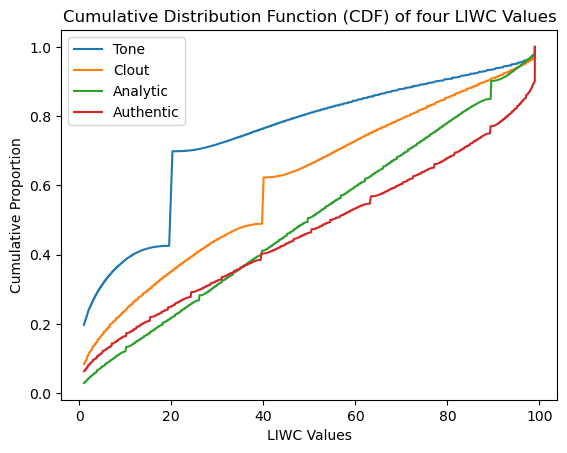

In [102]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)
def drawCDF(LIWCword):
    x , y = zip(*zip((np.cumsum(aus_comm[LIWCword].value_counts().sort_index())/np.sum(aus_comm[LIWCword].value_counts().sort_index())).index,(np.cumsum(aus_comm[LIWCword].value_counts().sort_index())/np.sum(aus_comm[LIWCword].value_counts().sort_index())).values))
    ax.plot(x, y,label = LIWCword)

drawCDF('Tone')
drawCDF('Clout')
drawCDF('Analytic')
drawCDF('Authentic')

plt.legend()
plt.xlabel("LIWC Values")
plt.ylabel("Cumulative Proportion")
plt.title("Cumulative Distribution Function (CDF) of four LIWC Values")

OpenTSNE

In [121]:
fourSummary = aus_comm[['Analytic','Clout','Authentic','Tone']]
fourSummary = np.array(fourSummary)
topicTag = aus_comm['newTopic'].astype(str)
topicTag
x,y = fourSummary, topicTag

In [131]:
y.value_counts()

-1    42059
-2    14370
0      3183
1      2112
2      2069
3      1745
4      1252
5      1234
6      1106
7      1003
Name: newTopic, dtype: int64

In [122]:
print("Data set contains %d samples with %d features" % fourSummary.shape)

Data set contains 70133 samples with 4 features


In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

46989 training samples
23144 test samples


In [124]:
from openTSNE import TSNE
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)


In [ ]:
%time embedding_train = tsne.fit(x_train)

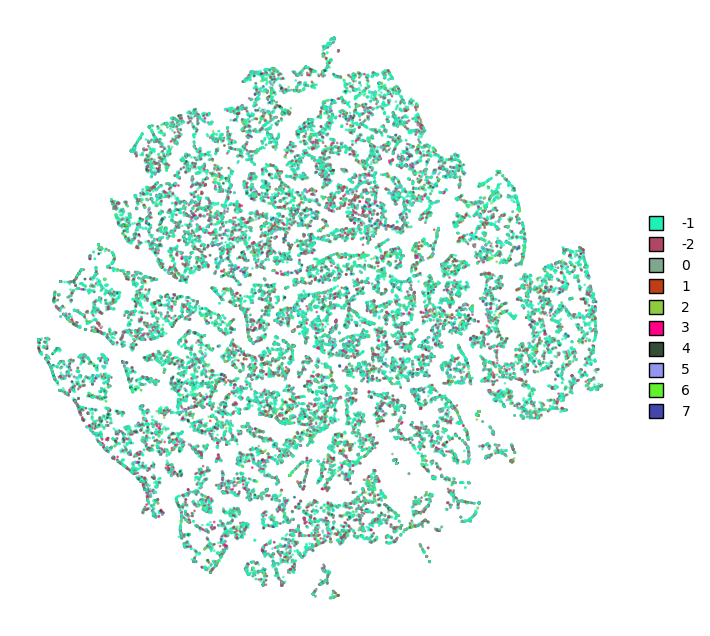

In [136]:
import utils
utils.plot(embedding_train, y_train, colors={
    '-1':"#21f0b6", '-2':"#af4764", '0':"#7ea78b", '1':"#bf3e15", '2':"#8fca40", '3':"#ff0087", '4':"#334d37", '5':"#9296ee", '6':"#61f22d", '7':"#4346ab"
})